<a href="https://colab.research.google.com/github/KavishaMadani/machine-learning/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Kavisha Madani**

**Student ID: 202318007**

**Hard-margin**

– Using CVXPY learn a hard-margin SVM classifier on the dual problem.

– Normalize the data and then perform same experiment on normalized data.

– Plot the decision boundary (separating hyperplane) in dark black and the margins in dotted lines.
Encircle the support vector points.

Problem Status: optimal


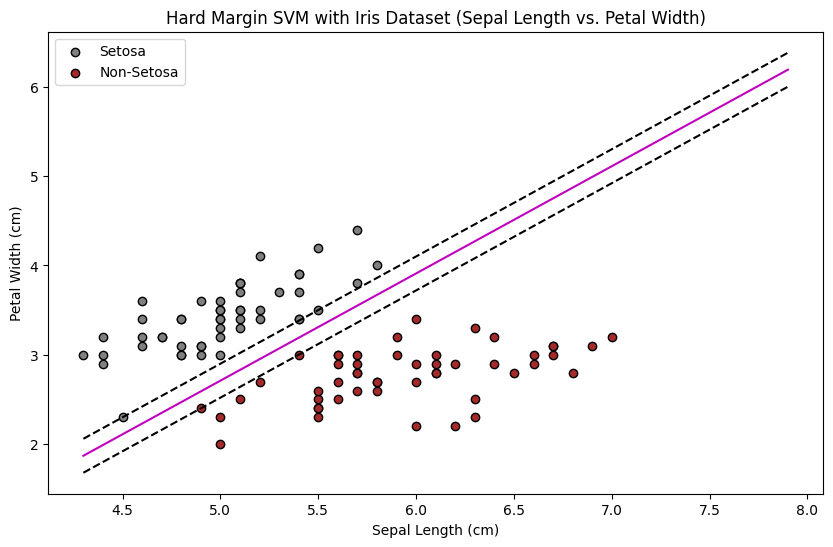

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from cvxpy import *

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

setosa_class = 0
non_setosa_class = 1

a = Variable((2, 1))
b = Variable()

objective = Minimize(norm(a, 2))

x_constraints = [a.T @ X[i] + b >= 1 for i in range(len(X)) if y[i] == setosa_class]
y_constraints = [a.T @ X[i] + b <= -1 for i in range(len(X)) if y[i] == non_setosa_class]

constraints = x_constraints + y_constraints

problem = Problem(objective, constraints)
problem.solve()

print("Problem Status:", problem.status)

p = a.value
q = b.value

plt.figure(figsize=(10, 6))

setosa_data = X[y == setosa_class]
plt.scatter(setosa_data[:, 0], setosa_data[:, 1], c='gray', label='Setosa', edgecolors='k')

non_setosa_data = X[y == non_setosa_class]
plt.scatter(non_setosa_data[:, 0], non_setosa_data[:, 1], c='brown', label='Non-Setosa', edgecolors='k')

if a.value is not None:
  xx = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
  yy = (-q - (p[0]*xx))/p[1]
  plt.plot(xx, yy, 'm')

  plt.plot(xx, (-q - (p[0]*xx) + 1)/p[1], 'k--')
  plt.plot(xx, (-q - (p[0]*xx) - 1)/p[1], 'k--')

plt.legend()

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.title('Hard Margin SVM with Iris Dataset (Sepal Length vs. Petal Width)')
plt.show()

**soft margin**

– Using CVXPY learn a soft-margin SVM classifier on the dual problem.

– Normalize the data and then perform same experiment on normalized data.

– Plot the decision boundary (separating hyperplane) in dark black and the margins in dotted lines.
Encircle the support vector points.

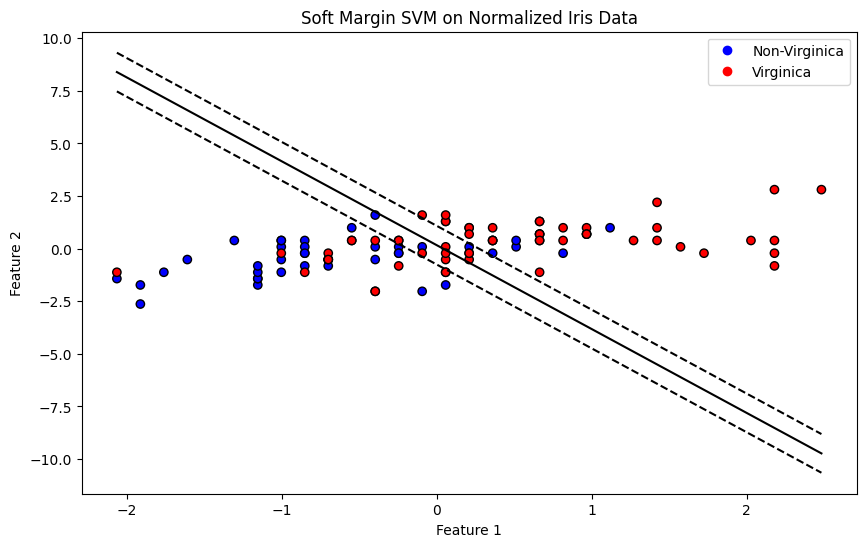

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import cvxpy as cp

# Step 1: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Consider only Setosa and Non-Setosa classes
X_data = X[y != 0]
y_data = y[y != 0]

# Step 2: Normalize the data
X_normalized_data = (X_data - np.mean(X_data, axis=0)) / np.std(X_data, axis=0)

# Step 3: Implement a soft-margin SVM classifier using CVXPY
C_param = 1.0  # Regularization parameter

# Variables
weights = cp.Variable(2)
bias = cp.Variable()
slack_vars = cp.Variable(len(y_data))

# Objective function
svm_objective = cp.Minimize(0.5 * cp.norm(weights, 2) + C_param * cp.sum(slack_vars))

# Constraints
svm_constraints = [
    weights.T @ X_normalized_data[i] + bias >= 1 - slack_vars[i] if y_data[i] == 1 else weights.T @ X_normalized_data[i] + bias <= -1 + slack_vars[i]
    for i in range(len(y_data))
] + [slack_vars >= 0]  # Non-negative slack variables

# Problem
svm_problem = cp.Problem(svm_objective, svm_constraints)
svm_problem.solve()

# Step 4: Plot the decision boundary and margins
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_normalized_data[:, 0], X_normalized_data[:, 1], c=y_data, cmap=plt.cm.bwr, edgecolors='k')

# Decision boundary and margins
xx_data = np.linspace(np.min(X_normalized_data[:, 0]), np.max(X_normalized_data[:, 0]), 100)
if weights.value is not None and weights.value[1] != 0:
    yy_data = (-bias.value - weights.value[0]*xx_data) / weights.value[1]
    margin_data = 1 / np.linalg.norm(weights.value)
    plt.plot(xx_data, yy_data, 'k-', label='Decision boundary')
    plt.plot(xx_data, yy_data + margin_data, 'k--', label='Upper margin')
    plt.plot(xx_data, yy_data - margin_data, 'k--', label='Lower margin')

# Add legend with matching colors
plt.legend(handles=scatter.legend_elements()[0], labels=['Non-Virginica', 'Virginica'], loc='upper right')

plt.title('Soft Margin SVM on Normalized Iris Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


**sklearn**

– Use sklearn SVM classifier and perform classification on dataset.

– Normalize the data and then perform same experiment on normalized data.

– Plot the decision boundary in dark black and the margins in dotted lines. This time use SKlearn’s
SVM with a linear kernel. Encircle the support vector points. Do you get the same answer as
when you use your own SVM?

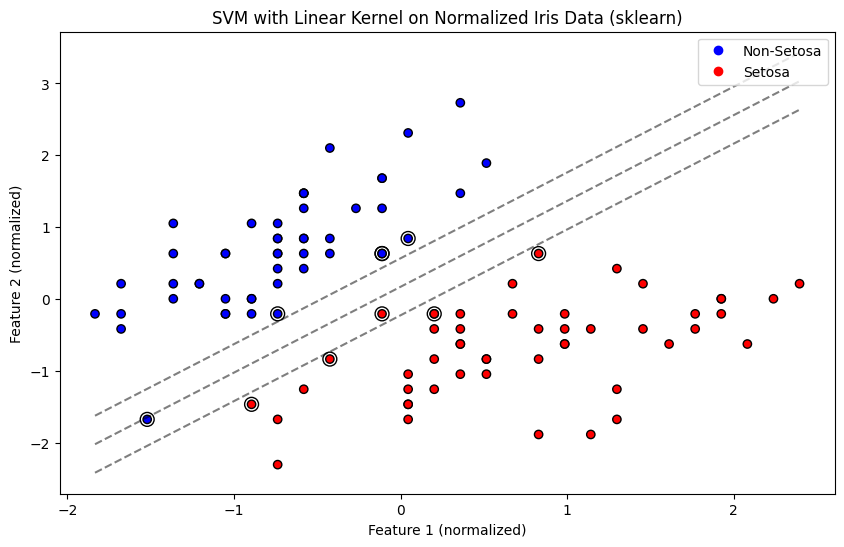

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Step 1: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Consider only Setosa and Non-Setosa classes
X_data = X[y != 2]
y_data = y[y != 2]

# Step 2: Normalize the data
scaler = StandardScaler()
X_normalized_data = scaler.fit_transform(X_data)

# Step 3: Implement SVM classifier using scikit-learn
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', C=1.0))
svm_model.fit(X_normalized_data, y_data)

# Step 4: Plot the decision boundary and margins
plt.figure(figsize=(10, 6))

# Plot data points with different colors for legend
scatter = plt.scatter(X_normalized_data[:, 0], X_normalized_data[:, 1], c=y_data, cmap=plt.cm.bwr, edgecolors='k')

# Plot decision boundary and margins
if hasattr(svm_model.named_steps['svc'], 'support_vectors_'):
    support_vectors = svm_model.named_steps['svc'].support_vectors_
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k')

    # Calculate the margin width
    margin = 1 / np.linalg.norm(svm_model.named_steps['svc'].coef_)
    w = svm_model.named_steps['svc'].coef_[0]
    b = svm_model.named_steps['svc'].intercept_[0]

    # Plot the margin lines
    xx = np.linspace(np.min(X_normalized_data[:, 0]), np.max(X_normalized_data[:, 0]), 100)
    yy = -w[0] / w[1] * xx - b / w[1]
    plt.plot(xx, yy, 'k--', alpha=0.5)
    plt.plot(xx, yy + margin, 'k--', alpha=0.5)
    plt.plot(xx, yy - margin, 'k--', alpha=0.5)

# Custom legend with different colors
plt.legend(handles=scatter.legend_elements()[0], labels=['Non-Setosa', 'Setosa'], loc='upper right')

plt.title('SVM with Linear Kernel on Normalized Iris Data (sklearn)')
plt.xlabel('Feature 1 (normalized)')
plt.ylabel('Feature 2 (normalized)')
plt.show()


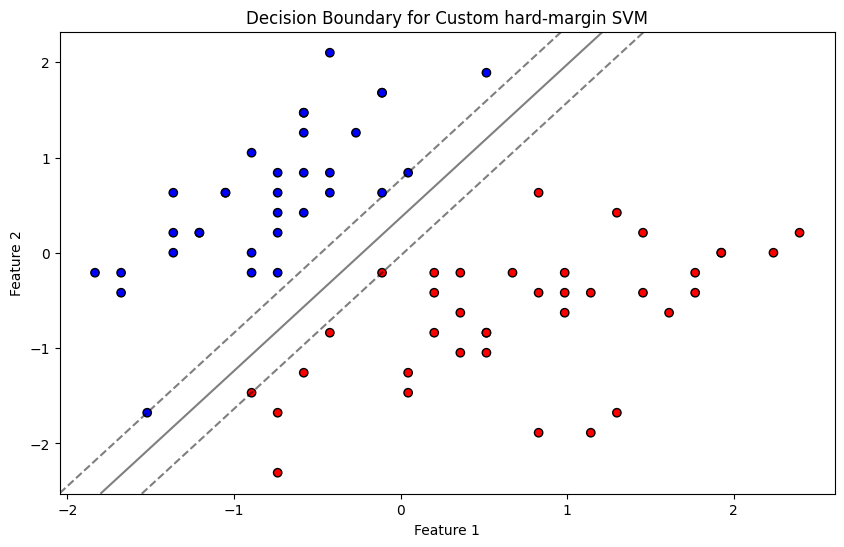

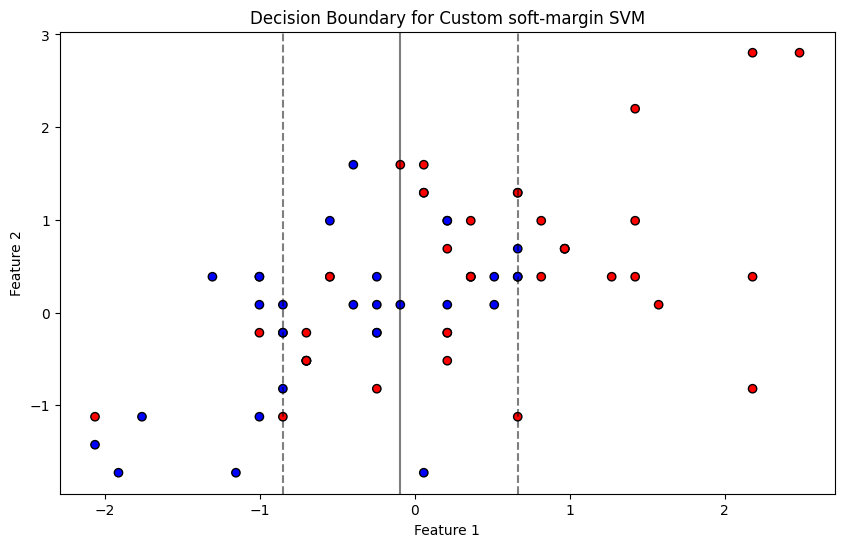

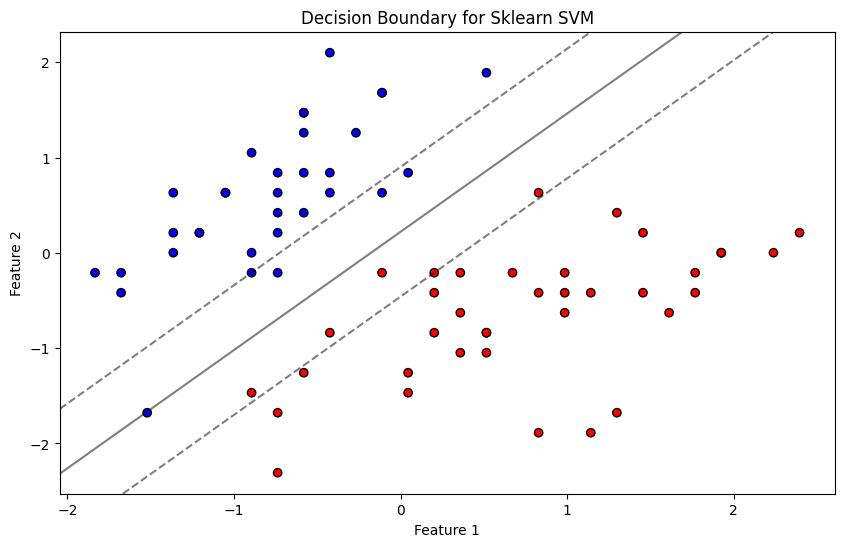

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from cvxpy import Variable, Problem, norm, sum, Minimize

# Load dataset
iris_dataset = datasets.load_iris()
X_setosa_non_setosa = iris_dataset.data[iris_dataset.target != 2, :2]  # Setosa and Non-Setosa classes
y_setosa_non_setosa = iris_dataset.target[iris_dataset.target != 2]
y_setosa_non_setosa = np.where(y_setosa_non_setosa == 0, -1, 1)  # Convert labels to +1, -1 for binary classification

X_virginica_non_virginica = iris_dataset.data[iris_dataset.target != 0, :2]  # Virginica and Non-Virginica classes
y_virginica_non_virginica = iris_dataset.target[iris_dataset.target != 0]
y_virginica_non_virginica = np.where(y_virginica_non_virginica == 2, 1, -1)  # Convert labels to +1, -1 for binary classification

# Normalize data
data_scaler = StandardScaler()

# Hard-margin SVM - Setosa and Non-Setosa
X_normalized_setosa_non_setosa = data_scaler.fit_transform(X_setosa_non_setosa)
X_train_setosa_non_setosa, X_test_setosa_non_setosa, y_train_setosa_non_setosa, y_test_setosa_non_setosa = train_test_split(
    X_normalized_setosa_non_setosa, y_setosa_non_setosa, test_size=0.3, random_state=42)

# Soft-margin SVM - Virginica and Non-Virginica
X_normalized_virginica_non_virginica = data_scaler.fit_transform(X_virginica_non_virginica)
X_train_virginica_non_virginica, X_test_virginica_non_virginica, y_train_virginica_non_virginica, y_test_virginica_non_virginica = train_test_split(
    X_normalized_virginica_non_virginica, y_virginica_non_virginica, test_size=0.3, random_state=42)

def train_custom_hard_margin_svm(data_X, data_y):
    weights = Variable((2,1))
    bias = Variable()
    constraints = [weights.T @ data_X[i] + bias >= 1 if data_y[i] == 1 else weights.T @ data_X[i] + bias <= -1 for i in range(len(data_y))]
    prob = Problem(Minimize(norm(weights, 2)), constraints)
    prob.solve()
    return weights.value, bias.value

def train_custom_soft_margin_svm(data_X, data_y, C_param=1.0):
    weights = Variable((2,1))
    bias = Variable()
    slack_vars = Variable(len(data_y))
    constraints = [weights.T @ data_X[i] + bias >= 1 - slack_vars[i] if data_y[i] == 1 else weights.T @ data_X[i] + bias <= -1 + slack_vars[i] for i in range(len(data_y))]
    constraints += [slack_vars[i] >= 0 for i in range(len(data_y))]
    prob = Problem(Minimize(0.5 * norm(weights, 2) + C_param * sum(slack_vars)), constraints)
    prob.solve()
    return weights.value, bias.value

def train_custom_svm_sklearn(data_X, data_y):
    svm_model = SVC(kernel='linear', C=1.0)
    svm_model.fit(data_X, data_y)
    return svm_model

def visualize_decision_boundary_custom(model, data_X, data_y, model_type='sklearn'):
    plt.figure(figsize=(10, 6))
    plt.scatter(data_X[:, 0], data_X[:, 1], c=data_y, cmap=plt.cm.bwr, edgecolors='k')

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx_vals = np.linspace(xlim[0], xlim[1], 30)
    yy_vals = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy_vals, xx_vals)
    xy_vals = np.vstack([XX.ravel(), YY.ravel()]).T
    if model_type == 'sklearn':
        Z = model.decision_function(xy_vals).reshape(XX.shape)
    else:
        weights, bias = model
        Z = (weights[0]*XX + weights[1]*YY + bias).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary for {model_type.capitalize()} SVM')
    plt.show()

# Train and visualize custom hard-margin SVM - Setosa and Non-Setosa
custom_hard_margin_weights, custom_hard_margin_bias = train_custom_hard_margin_svm(X_train_setosa_non_setosa, y_train_setosa_non_setosa)
visualize_decision_boundary_custom((custom_hard_margin_weights, custom_hard_margin_bias), X_train_setosa_non_setosa, y_train_setosa_non_setosa, model_type='custom hard-margin')

# Train and visualize custom soft-margin SVM - Virginica and Non-Virginica
custom_soft_margin_weights, custom_soft_margin_bias = train_custom_soft_margin_svm(X_train_virginica_non_virginica, y_train_virginica_non_virginica)
visualize_decision_boundary_custom((custom_soft_margin_weights, custom_soft_margin_bias), X_train_virginica_non_virginica, y_train_virginica_non_virginica, model_type='custom soft-margin')

# Train and visualize SVM using sklearn - Setosa and Non-Setosa
svm_model_sklearn_setosa_non_setosa = train_custom_svm_sklearn(X_train_setosa_non_setosa, y_train_setosa_non_setosa)
visualize_decision_boundary_custom(svm_model_sklearn_setosa_non_setosa, X_train_setosa_non_setosa, y_train_setosa_non_setosa)


Use the given SVM kernels and perform SVM classification on the normalized data using your own
implementation of hard-margin, soft-margin and sklearn. Compare and comment on results.

– Linear

– polynomial

– radial basis function

In [ ]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from cvxpy import Variable, Problem, norm, sum, Minimize

# Load dataset
iris_dataset = datasets.load_iris()
X_data = iris_dataset.data[iris_dataset.target != 2, :2]  # Take only the first two features and exclude the third class
y_data = iris_dataset.target[iris_dataset.target != 2]
y_data = np.where(y_data == 0, -1, 1)  # Convert labels to +1, -1 for binary classification

# Normalize data
data_scaler = StandardScaler()
X_normalized_data = data_scaler.fit_transform(X_data)

# Split data into training and testing sets
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_normalized_data, y_data, test_size=0.3, random_state=42)
# Linear kernel SVM
linear_svm_model = SVC(kernel='linear', C=1.0)
linear_svm_model.fit(X_train_data, y_train_data)

# Polynomial kernel SVM
poly_svm_model = SVC(kernel='poly', degree=3, C=1.0)  # Degree can be adjusted
poly_svm_model.fit(X_train_data, y_train_data)

# Radial basis function kernel SVM
rbf_svm_model = SVC(kernel='rbf', gamma='scale', C=1.0)  # Gamma can be adjusted
rbf_svm_model.fit(X_train_data, y_train_data)


SVC()

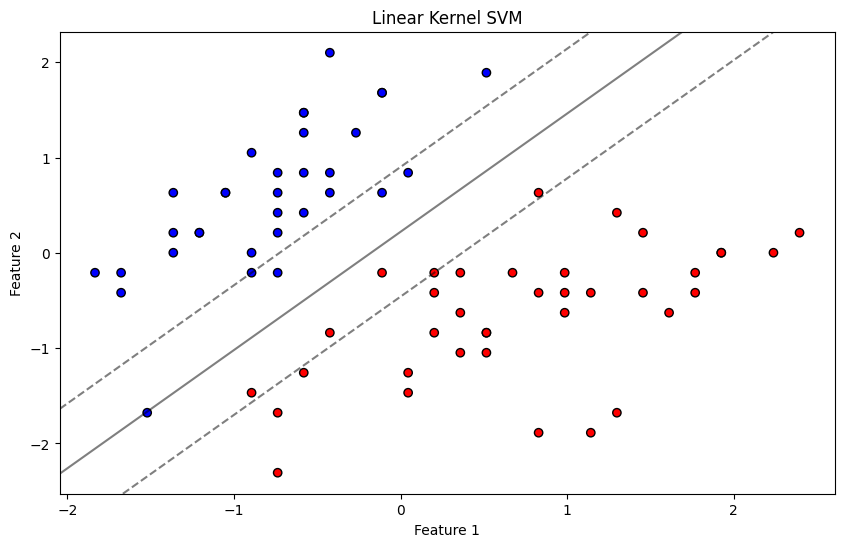

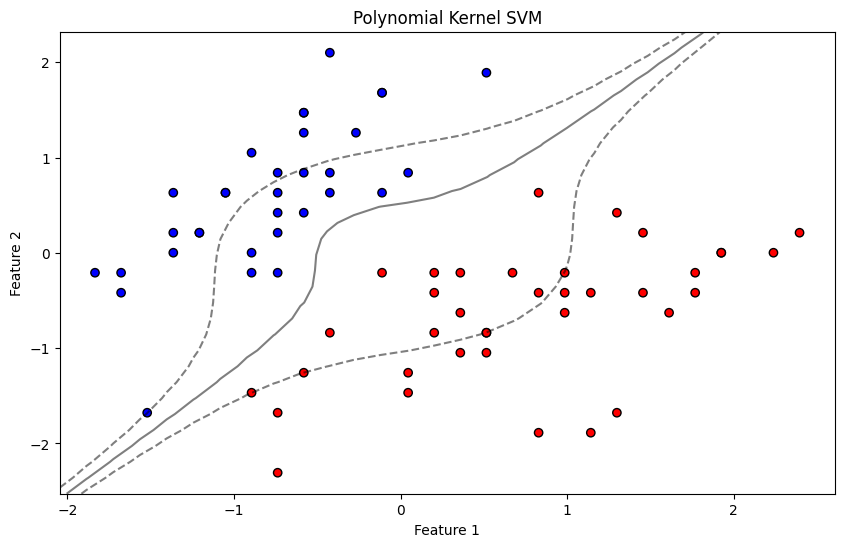

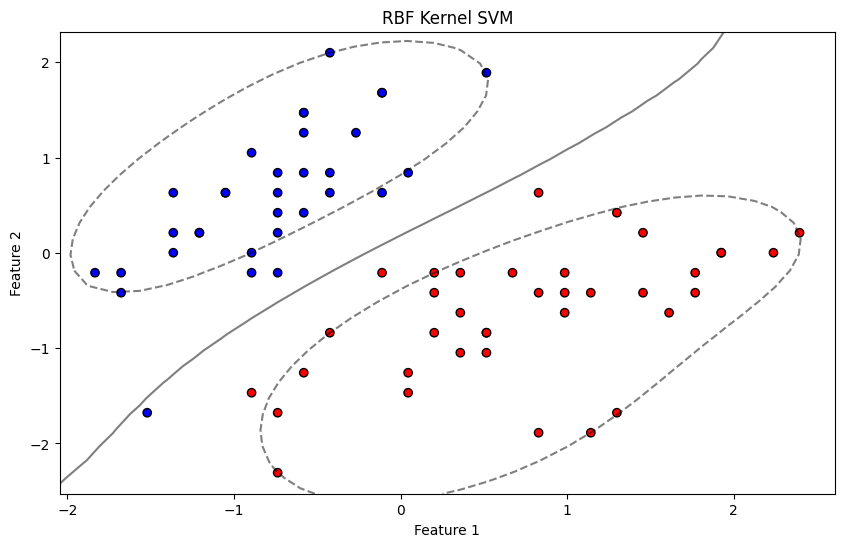

In [ ]:
def visualize_decision_boundary(model, data_X, data_y, plot_title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data_X[:, 0], data_X[:, 1], c=data_y, cmap=plt.cm.bwr, edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx_vals = np.linspace(xlim[0], xlim[1], 30)
    yy_vals = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy_vals, xx_vals)
    xy_vals = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy_vals).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.title(plot_title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

visualize_decision_boundary(linear_svm_model, X_train_data, y_train_data, 'Linear Kernel SVM')
visualize_decision_boundary(poly_svm_model, X_train_data, y_train_data, 'Polynomial Kernel SVM')
visualize_decision_boundary(rbf_svm_model, X_train_data, y_train_data, 'RBF Kernel SVM')


• If you throw away all the points except the support vectors does your decision boundary remain the
same? Why?

If we throw away all the points except the support vectors, the decision boundary may remain the same. This is because support vectors are the data points that lie closest to the decision boundary or are otherwise influential in determining the position of the decision boundary.

The decision boundary in an SVM is determined by the support vectors. These are the data points that have non-zero coefficients (alphas) in the optimized SVM model. All other data points have zero coefficients.

Since the decision boundary is primarily influenced by the support vectors, removing other data points won't necessarily change the position of the decision boundary as long as the support vectors remain unchanged. The support vectors define the margin and the position of the decision boundary relative to the classes.

However, if the support vectors themselves are removed, then the decision boundary might change, as the remaining support vectors might define a different margin and boundary position. Therefore, if you throw away all points except the support vectors, the decision boundary might or might not remain the same depending on whether the remaining support vectors maintain the same configuration as before.





